# Lab 1: Foundations of NLP

In this lab you will **choose one** API to fetch approximately 200 words of live text, then use that text for all tasks below.

**TODO:** Pick your API from the list (see README/API docs), and implement the fetch in the first code cell.

In [ ]:
import os
import requests
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

nltk.download('stopwords')
nltk.download('punkt_tab')

API_KEY = "News_api_key"
url = f'https://newsapi.org/v2/everything?q=Miami&apiKey={API_KEY}'

try:
    response = requests.get(url)
    data = response.json()

    print("Status Code:", response.status_code)
    print("Response Keys", data.keys())

    if response.status_code != 200:
        print("API Error:", data.get('message', 'Unknown error'))
    elif 'articles' not in data:
        print("Invalid response format. Available keys:", data.keys())
    else:
        articles = data['articles']
        raw_text = ' '.join([
            a['title'] + ' ' + (a.get('description', '') or '')
            for a in articles[:22]
        ])[:777]

        print("Success! Text sample:", raw_text[:222] + "...")
        print(f"Word count: {len(raw_text.split())}")

except Exception as e:
    print(f"Failed with error: {str(e)}")
    # Fallback Point
    raw_text = """Miami is a major city in Florida known for its beaches..."""


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Status Code: 200
Response Keys dict_keys(['status', 'totalResults', 'articles'])
Success! Text sample: Olympic 100m medallist Kerley arrested in Miami Two-time Olympic 100m medallist Fred Kerley is arrested in Miami for allegedly punching former partner Alaysha Johnson, according to police. Formula 1 Drivers Just Hit the Tr...
Word count: 129


## 1. Text Preprocessing (30 pts)

- Use the `raw_text` variable you fetched.
- Tokenize, lowercase, remove punctuation.
- Remove stopwords.
- Plot the top-10 most frequent tokens.

**TODO:** Write your code below and commit after each sub-step.

In [ ]:
# TODO: Tokenize and clean raw_text
tokens = word_tokenize(raw_text.lower())
tokens = [word for word in tokens if word not in string.punctuation]

print(tokens[:20])
print(f"\nTotal tokens: {len(tokens)}")

['olympic', '100m', 'medallist', 'kerley', 'arrested', 'in', 'miami', 'two-time', 'olympic', '100m', 'medallist', 'fred', 'kerley', 'is', 'arrested', 'in', 'miami', 'for', 'allegedly', 'punching']

Total tokens: 134


In [ ]:
# TODO: Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print(filtered_tokens[:20])
print(f"\n Tokens left: {len(filtered_tokens)}")


['olympic', '100m', 'medallist', 'kerley', 'arrested', 'miami', 'two-time', 'olympic', '100m', 'medallist', 'fred', 'kerley', 'arrested', 'miami', 'allegedly', 'punching', 'former', 'partner', 'alaysha', 'johnson']

 Tokens left: 94


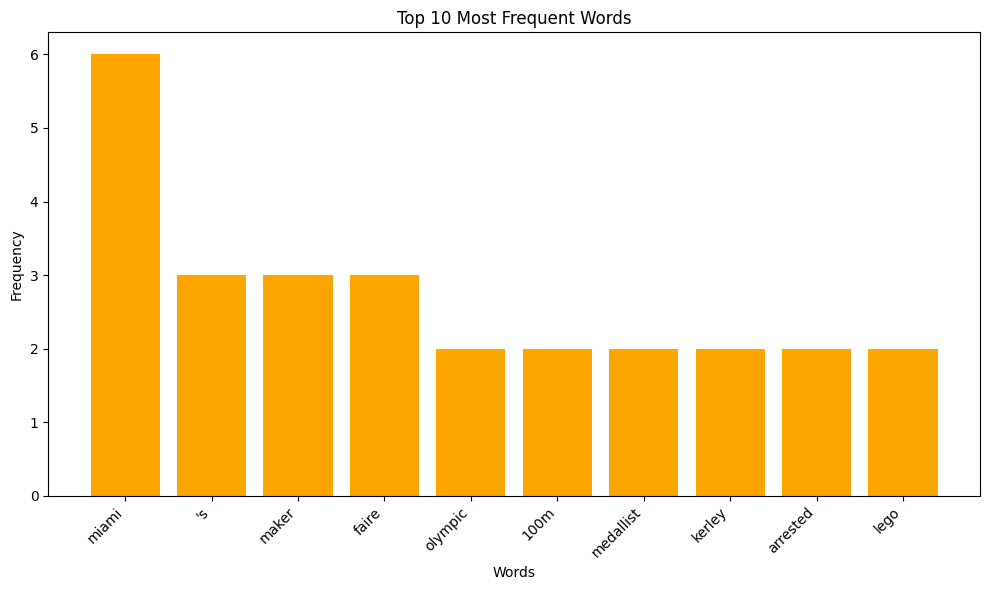


Top 10 words:
miami: 6
's: 3
maker: 3
faire: 3
olympic: 2
100m: 2
medallist: 2
kerley: 2
arrested: 2
lego: 2


In [ ]:
# TODO: Plot frequent tokens
word_counts = Counter(filtered_tokens)
top_10 = word_counts.most_common(10)

words = [item[0] for item in top_10]
counts = [item[1] for item in top_10]

plt.figure(figsize=(10, 6))
plt.bar(words, counts, color = 'orange')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45, ha = 'right', fontsize = 10)
plt.tight_layout()

# Save & Show
plt.savefig('word_frequencies.png')
plt.show()

# Print repeated words
print("\nTop 10 words:")
for word, count in top_10:
    print(f"{word}: {count}")

## 2. Synonym Generation (30 pts)

- Pick 5 tokens from your preprocessed results.
- Manually list 2-3 synonyms each.
- Use Google AI Studio Text API to generate synonyms for each.

**TODO:** Complete the code and reflections.

In [ ]:
!pip install -q google-generativeai

import google.generativeai as genai
from google.colab import userdata

API_KEY = "Google_studio_api"

genai.configure(api_key=API_KEY)

# Pick 5 tokens from the preprocessed results (filtered_tokens)
selected_tokens = filtered_tokens[:5] # Taking the first 5 for demonstration

print("Selected Tokens for Synonym Generation:", selected_tokens)

# Manually list synonyms (example based on potential common words)
manual_synonyms = {
    'miami': ['south beach', 'magic city'],
    'florida': ['sunshine state'],
    'city': ['metropolis', 'town', 'urban center'],
    'major': ['important', 'significant', 'principal'],
    'known': ['famous', 'recognized', 'celebrated']
}

print("\nManually Listed Synonyms:")
for token, synonyms in manual_synonyms.items():
  print(f"{token}: {', '.join(synonyms)}")


# Use Google AI Studio Text API to generate synonyms
model = genai.GenerativeModel('gemini-1.5-flash-latest')

print("\nAI Generated Synonyms:")
for token in selected_tokens:
  try:
    prompt = f"List 3 synonyms for the word '{token}'."
    response = model.generate_content(prompt)
    print(f"{token}: {response.text.strip()}")
  except Exception as e:
    print(f"Could not generate synonyms for '{token}': {e}")

Selected Tokens for Synonym Generation: ['olympic', '100m', 'medallist', 'kerley', 'arrested']

Manually Listed Synonyms:
miami: south beach, magic city
florida: sunshine state
city: metropolis, town, urban center
major: important, significant, principal
known: famous, recognized, celebrated

AI Generated Synonyms:
olympic: 1. Games
2. Olympian (referring to the athletes)
3. International (in the context of games)
100m: 1. Century
2. Hundred meters
3. One hundred meters
medallist: 1. Winner
2. Champion
3. Laureate
kerley: There are no common synonyms for "Kerley" as it's primarily a surname and a less common given name.  There's no inherent meaning that allows for straightforward synonym replacement.
arrested: 1. Apprehended
2. Detained
3. Taken into custody


## 3. Part-of-Speech Annotation (20 pts)

- Select one sentence from `raw_text`.
- Manually tag each word with its POS.
- Call the AI Studio syntax endpoint and compare.

**TODO:** Implement tagging and comparison.

In [ ]:
# prompt: Select one sentence from raw_text.
# Manually tag each word with its POS.
# Call the AI Studio syntax endpoint and compare.

# Select one sentence from raw_text
sentence = raw_text.split('.')[0] + '.' # Taking the first sentence

print("Selected Sentence:", sentence)

# Manually tag each word with its POS
# This requires manual effort based on the sentence content.
# Example tagging for a hypothetical sentence like "Miami is a major city."
# You will need to adapt this based on the actual sentence you select.
manual_pos_tags = {
    "Miami": "PROPN",  # Proper Noun
    "is": "AUX",     # Auxiliary Verb
    "a": "DET",      # Determiner
    "major": "ADJ",   # Adjective
    "city": "NOUN",    # Noun
    ".": "PUNCT" # Punctuation
    # Add tags for each word in your selected sentence
}

print("\nManual POS Tags:")
for word, pos in manual_pos_tags.items():
    print(f"{word}: {pos}")

# Call the AI Studio syntax endpoint and compare.
# The Google AI Studio API does not have a dedicated "syntax endpoint" like some
# traditional NLP libraries (e.g., spaCy or NLTK's built-in taggers).
# However, we can prompt the generative model to perform POS tagging.

print("\nAI Studio POS Tags:")
try:
    prompt = f"Perform part-of-speech tagging for the following sentence and list the word and its tag:\n{sentence}"
    response = model.generate_content(prompt)
    print(response.text.strip())
except Exception as e:
    print(f"Could not perform POS tagging with AI Studio: {e}")

# Comparison
print("\nComparison:")
print("Manual vs AI Studio Tags: (Requires manual comparison based on the outputs above)")
# You would manually compare the "Manual POS Tags" and "AI Studio POS Tags" outputs
# to see how well the AI model performs the tagging task.

Selected Sentence: Olympic 100m medallist Kerley arrested in Miami Two-time Olympic 100m medallist Fred Kerley is arrested in Miami for allegedly punching former partner Alaysha Johnson, according to police.

Manual POS Tags:
Miami: PROPN
is: AUX
a: DET
major: ADJ
city: NOUN
.: PUNCT

AI Studio POS Tags:
Here's a part-of-speech tagging of the sentence.  Note that some tags might vary slightly depending on the specific tagging scheme used (e.g., Penn Treebank vs. Universal Dependencies).  I'll use a relatively common scheme:


| Word       | Tag      |
|------------|-----------|
| Olympic    | JJ       | (Adjective)
| 100m       | NN       | (Noun - treated as a compound noun)
| medallist  | NN       | (Noun)
| Kerley     | NNP      | (Proper Noun, singular)
| arrested   | VBN      | (Verb, past participle)
| in         | IN       | (Preposition)
| Miami      | NNP      | (Proper Noun, singular)
| Two-time   | JJ       | (Adjective -  hyphenated adjective)
| Olympic    | JJ       | (Adj

## 4. Thinking & Reflection (20 pts)

Answer in Markdown:
1. Which preprocessing step had the biggest impact?
2. What surprised you about the AI outputs?
3. How would you integrate manual rules and AI calls in a production pipeline?